<h2>Import Packages</h2>

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os
import sys
import tarfile

In [26]:
import urllib

<h2>Fetching Dataset</h2>

In [27]:
downloadRoot = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
path = "datasets/housing"
downloadURL = downloadRoot + path + "/housing.tgz"

In [28]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [29]:
def fetchData(hURL = downloadURL, hPath = path):
    if not os.path.isdir(hPath):
        os.makedirs(hPath)
    tgzPath = os.path.join(hPath, "housing.tgz")
    urllib.request.urlretrieve(hURL, tgzPath)
    housingTgz = tarfile.open(tgzPath)
    housingTgz.extractall(path = hPath)
    housingTgz.close()

In [30]:
fetchData()

<h2>Quick Look At Data</h2>

In [31]:
housingDf = pd.read_csv("datasets\housing\housing.csv")
housingDf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [32]:
def loadData(housingPath = path):
    csvPath = os.path.join(housingPath, "housing.csv")
    return pd.read_csv(csvPath)

In [33]:
houseDf = loadData()
houseDf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [34]:
houseDf.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [35]:
houseDf.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [36]:
houseDf.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [37]:
houseDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [38]:
for i in houseDf.columns:
    print(i,":", houseDf[i].isnull().values.any())

longitude : False
latitude : False
housing_median_age : False
total_rooms : False
total_bedrooms : True
population : False
households : False
median_income : False
median_house_value : False
ocean_proximity : False


<AxesSubplot:>

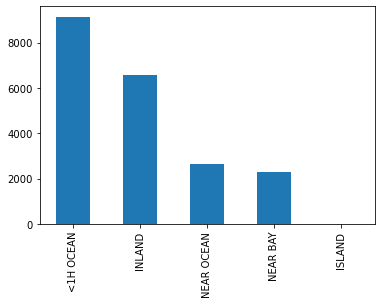

In [39]:
houseDf['ocean_proximity'].value_counts().plot(kind = 'bar')

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

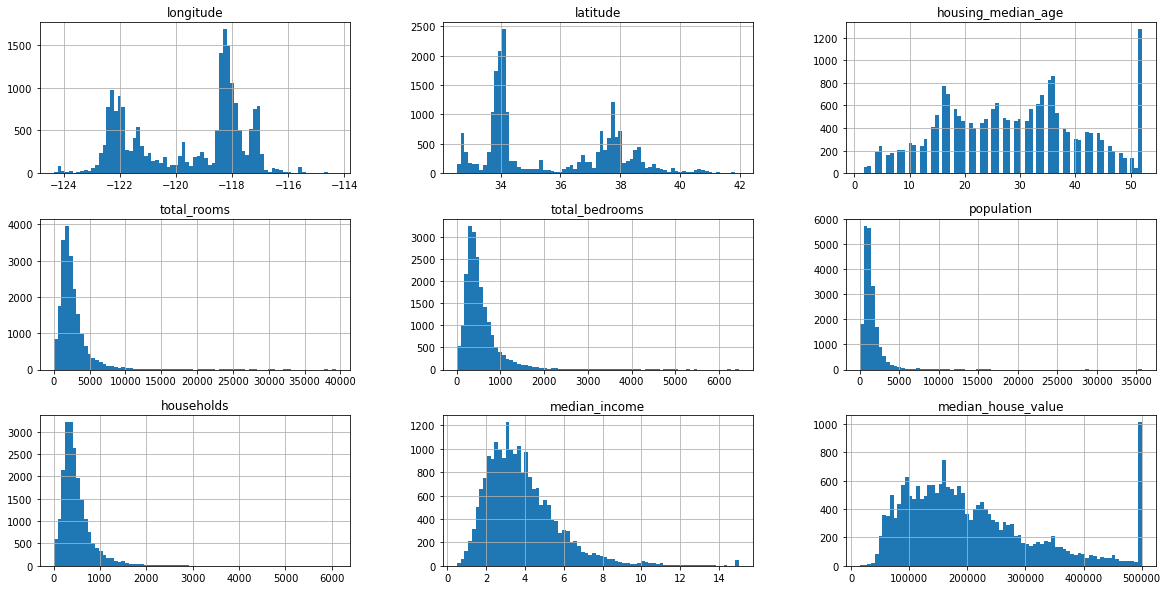

In [40]:
houseDf.hist(bins = 75, figsize= (20, 10))

<h2>Test Train Split</h2>

In [ ]:
temp = houseDf
houseDf['income_cat'] = pd.cut(houseDf['median_income'],
                            bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                            labels=[1,2,3,4,5])

In [56]:
from sklearn.model_selection import train_test_split

trainSet, testSet = train_test_split(houseDf, test_size = 0.2, random_state= 50)

In [42]:
testSet.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1945,-120.93,38.77,9.0,2229.0,355.0,788.0,341.0,5.5111,196300.0,INLAND
18006,-121.97,37.30,31.0,3340.0,735.0,1891.0,686.0,4.8542,275000.0,<1H OCEAN
13062,-121.32,38.57,15.0,3369.0,499.0,1733.0,470.0,5.3100,127500.0,INLAND
13396,-117.57,34.02,5.0,6933.0,1311.0,3845.0,1285.0,4.6727,158900.0,INLAND
9787,-120.79,36.06,29.0,1916.0,386.0,1019.0,314.0,2.4881,87500.0,<1H OCEAN


<AxesSubplot:>

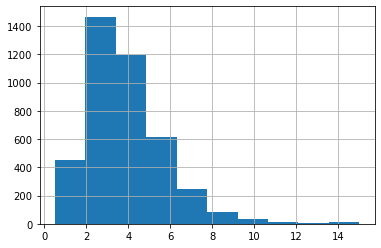

In [43]:
testSet['median_income'].hist()

In [53]:
# temp = houseDf
# houseDf['income_cat'] = pd.cut(houseDf['median_income'],
#                             bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
#                             labels=[1,2,3,4,5])

In [54]:
houseDf['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

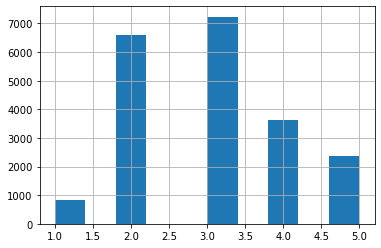

In [55]:
houseDf['income_cat'].hist()

In [57]:
from sklearn.model_selection import StratifiedShuffleSplit

stratifiedSplit = StratifiedShuffleSplit(n_splits= 3, test_size = 0.2, random_state = 40)
for trainIndex, testIndex in stratifiedSplit.split(houseDf, houseDf['income_cat']):
    stratTrainSet = houseDf.loc[trainIndex]
    stratTestSet = houseDf.loc[testIndex]

In [58]:
def incomeCatProportion(data):
    return data['income_cat'].value_counts()/len(data)

compareProps = pd.DataFrame({
    "overall" : incomeCatProportion(temp),
    "Stratified" : incomeCatProportion(stratTrainSet),
    "Random" : incomeCatProportion(trainSet),
}).sort_index()

compareProps['Random %Error'] = 100*compareProps['Random']/compareProps["overall"] - 100
compareProps['Stratified %Error'] = 100*compareProps['Stratified']/compareProps['overall']-100
compareProps

,overall,Stratified,Random,Random %Error,Stratified %Error
1,0.039826,0.039789,0.039365,-1.155718,-0.091241
2,0.318847,0.318859,0.318617,-0.072177,0.003799
3,0.350581,0.350594,0.353985,0.970840,0.003455
4,0.176308,0.176296,0.175569,-0.419071,-0.006870
5,0.114438,0.114462,0.112464,-1.725233,0.021169


In [59]:
for s in (stratTrainSet, stratTestSet, testSet, trainSet):
    s.drop("income_cat", axis = 1, inplace = True)

 <h2>Visualizing the Data</h2>

In [60]:
visualDf = houseDf

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

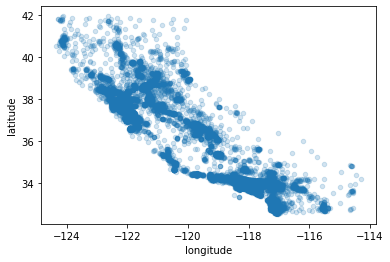

In [61]:
visualDf.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.2, colormap = "YlGn")

In [70]:
# import plotly.express as px
# import plotly.io as pio
# pio.renderers.default = 'iframe_connected'
# fig = px.scatter(visualDf, x="longitude", y="latitude", 
#                  size='households', hover_data=['median_house_value'])
# fig.show()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

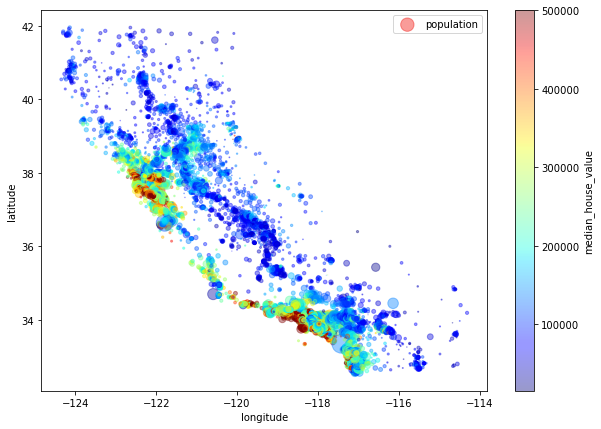

In [74]:
houseDf.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=houseDf["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)

<h4>Download the California Image</h4>

In [75]:
PROJECT_ROOT_DIR = "."

In [78]:
imagePath = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(imagePath, exist_ok=True)
filename = "california.png"
url = downloadRoot + "images/end_to_end_project/" + filename

In [79]:
urllib.request.urlretrieve(url, os.path.join(imagePath, filename))

('.\\images\\california.png', <http.client.HTTPMessage at 0x26117d35f70>)

Text(0.5, 0, 'Longitude')

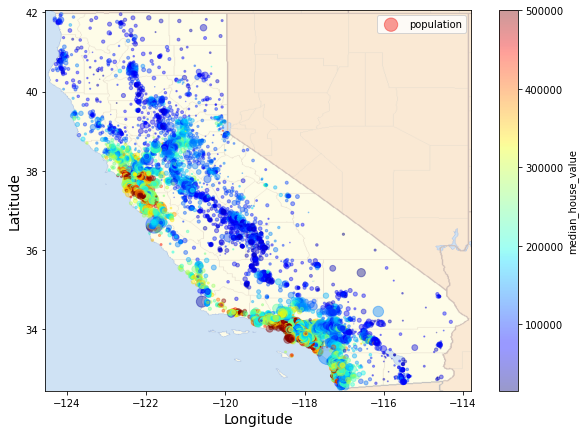

In [82]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(imagePath, filename))
ax = houseDf.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=houseDf["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

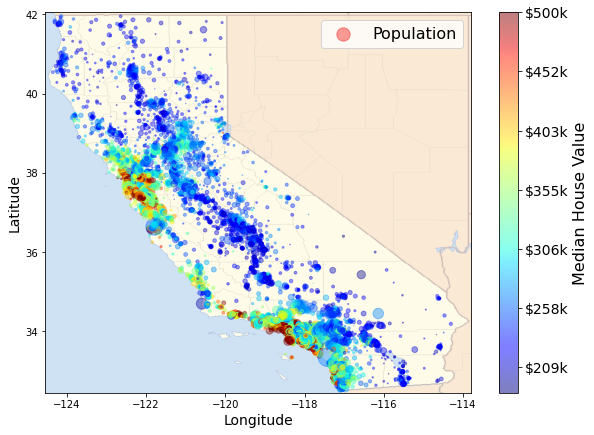

In [86]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(imagePath, filename))
ax = houseDf.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=houseDf['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = houseDf["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)

<h2>Looking for Correlations</h2>

In [87]:
houseDf.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


<AxesSubplot:>

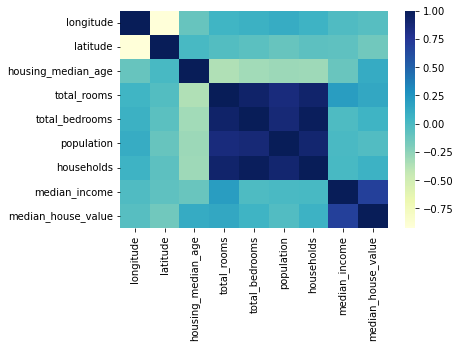

In [89]:
sns.heatmap(houseDf.corr(), cmap="YlGnBu")

In [91]:
corrMatrix = houseDf.corr()
corrMatrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

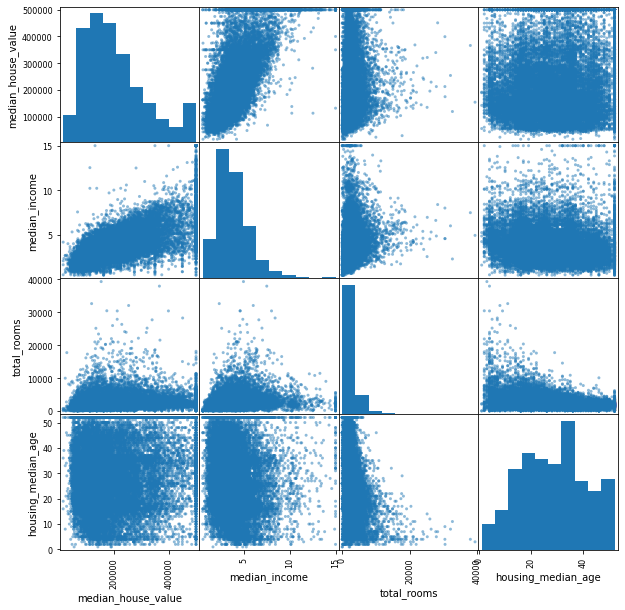

In [106]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(houseDf[attributes], figsize = (10, 10))

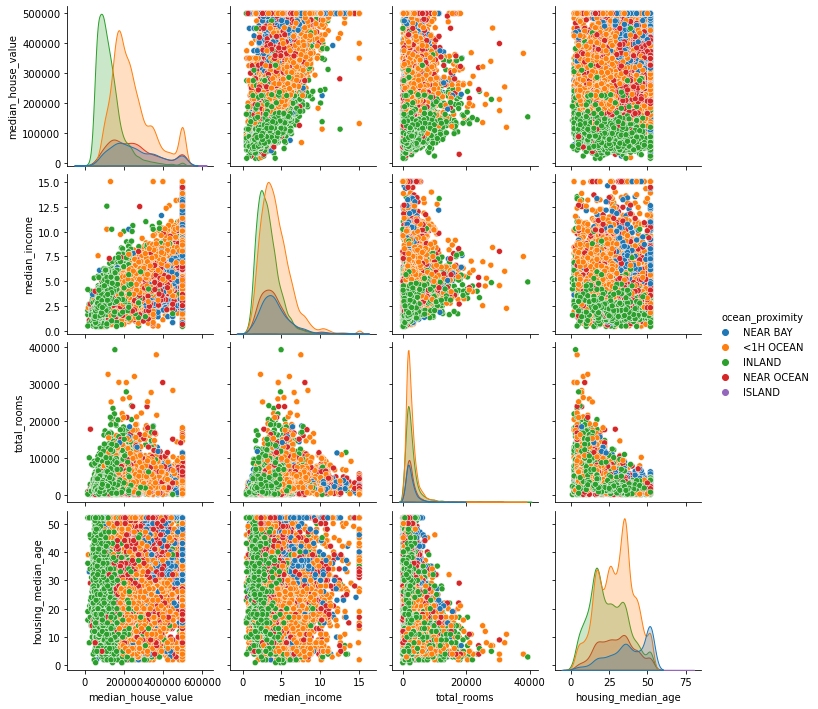

In [107]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age", "ocean_proximity"]
sns.pairplot(houseDf[attributes], hue = "ocean_proximity")

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

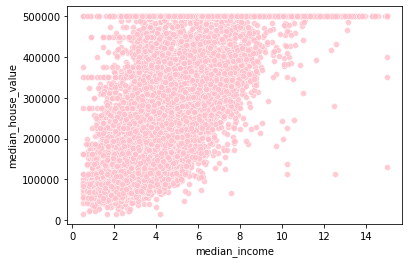

In [113]:
sns.scatterplot(data = houseDf, x = "median_income", y = "median_house_value", alpha = 0.8, color = 'pink')

<h2>Alternative Attribute Combinations</h2>

In [115]:
houseDf['roomsPerHousehold'] = houseDf['total_rooms']/houseDf['households']
houseDf['bedroomPerRoom'] = houseDf['total_bedrooms']/housingDf['total_rooms']
houseDf['populationPerHousehold'] = houseDf['population']/houseDf['households']

In [117]:
corrMatrix = houseDf.corr()
corrMatrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,roomsPerHousehold,bedroomPerRoom,populationPerHousehold
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.092657,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.113815,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.136089,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.133798,-0.187900,-0.024581
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.001538,0.084238,-0.028355
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.035319,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.080598,0.065087,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.326895,-0.615661,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.255880,-0.023737
roomsPerHousehold,-0.027540,0.106389,-0.153277,0.133798,0.001538,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.416952,-0.004852


<AxesSubplot:>

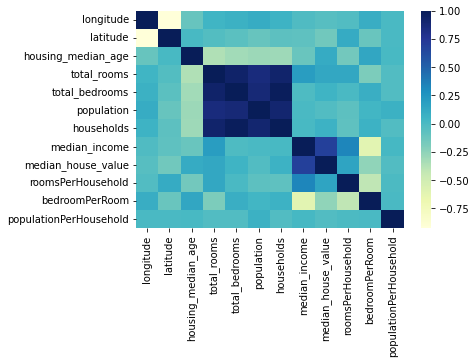

In [118]:
sns.heatmap(corrMatrix, cmap="YlGnBu")

In [120]:
corrMatrix['median_house_value'].sort_values(ascending = False)

median_house_value        1.000000
median_income             0.688075
roomsPerHousehold         0.151948
total_rooms               0.134153
housing_median_age        0.105623
households                0.065843
total_bedrooms            0.049686
populationPerHousehold   -0.023737
population               -0.024650
longitude                -0.045967
latitude                 -0.144160
bedroomPerRoom           -0.255880
Name: median_house_value, dtype: float64

(0.0, 10.0, 0.0, 520000.0)

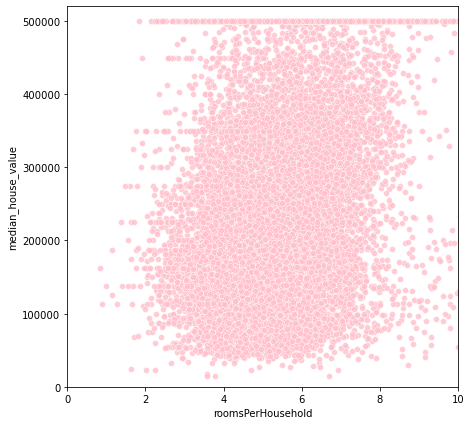

In [130]:
fig = plt.gcf()
fig.set_size_inches(7, 7)
sns.scatterplot(data = houseDf, x = 'roomsPerHousehold', y = 'median_house_value', alpha = 0.8, color = 'pink')
plt.axis([0, 10, 0, 520000])

In [131]:
houseDf.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,roomsPerHousehold,bedroomPerRoom,populationPerHousehold
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213039,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.057983,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175427,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239821,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


<h2>Data Preparation</h2>

In [173]:
houseDf.dropna(subset=['total_bedrooms'], inplace = True)
houseDf = stratTrainSet.drop("median_house_value", axis = 1)
houseDfLabels = stratTrainSet['median_house_value'].copy()

In [174]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [175]:
houseDfNum = houseDf.drop("ocean_proximity", axis = 1)

imputer.fit(houseDfNum)

SimpleImputer(strategy='median')

In [176]:
imputer.statistics_

array([-118.49  ,   34.25  ,   29.    , 2115.    ,  433.5   , 1164.5   ,
        408.    ,    3.5341])

In [177]:
houseDfX = imputer.transform(houseDfNum)

In [178]:
houseDfTr = pd.DataFrame(houseDfX, columns = houseDfNum.columns, index = houseDfNum.index)
houseDfTr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4718,-118.38,34.06,31.0,4345.0,1158.0,1987.0,1070.0,2.8233
1131,-121.63,39.76,22.0,2598.0,482.0,1151.0,490.0,2.8182
5552,-118.38,33.95,29.0,1821.0,588.0,1397.0,523.0,2.5833
1669,-122.23,38.06,52.0,1350.0,266.0,490.0,257.0,3.1250
19259,-122.74,38.45,17.0,3064.0,588.0,1704.0,590.0,3.9329


In [179]:
houseOceanProximity = houseDf[['ocean_proximity']]
houseOceanProximity[:10]

,ocean_proximity
4718,<1H OCEAN
1131,INLAND
5552,<1H OCEAN
1669,NEAR BAY
19259,<1H OCEAN
3733,<1H OCEAN
18529,NEAR OCEAN
14593,NEAR OCEAN
16863,NEAR OCEAN
3811,<1H OCEAN


In [180]:
from sklearn.preprocessing import OrdinalEncoder

ordinalEncoder = OrdinalEncoder()
houseOceanProximityEncoder = ordinalEncoder.fit_transform(houseOceanProximity)
houseOceanProximityEncoder[:10]

array([[0.],
       [1.],
       [0.],
       [3.],
       [0.],
       [0.],
       [4.],
       [4.],
       [4.],
       [0.]])

In [181]:
ordinalEncoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [182]:
colName = ["total_rooms", "total_bedrooms", "population", "households"]

roomsIndex, bedroomIndex, populationIndex, householdIndex = [houseDf.columns.get_loc(c) for c in colName]

In [183]:
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, addBedroomsPerRoom = True):
        self.addBedroomsPerRoom = addBedroomsPerRoom
    
    def fit(self, x, y = None):
        return self
    
    def transform(self, x):
        roomsPerHousehold = x[:, roomsIndex] / x[:, householdIndex]
        populationPerHousehold = x[:, bedroomIndex] / x[:, householdIndex]
        if self.addBedroomsPerRoom:
            bedroomsPerRoom = x[:, bedroomIndex] /x[:, roomsIndex]
            return np.c_[x, roomsPerHousehold, populationPerHousehold, bedroomsPerRoom]
        else:
            return np.c_[x, roomsPerHousehold, populationPerHousehold]

In [184]:
combinedAttributeAdder = CombinedAttributeAdder(addBedroomsPerRoom = False)
houseExtraAttributeAdder = combinedAttributeAdder.transform(houseDf.values)

In [185]:
houseDfExtraAttribute = pd.DataFrame(
    houseExtraAttributeAdder,
    columns = list(houseDf.columns) + ["roomsPerHousehold", "populationPerHousehold"],
    index = houseDf.index
)

In [186]:
houseDfExtraAttribute.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,roomsPerHousehold,populationPerHousehold
4718,-118.38,34.06,31.0,4345.0,1158.0,1987.0,1070.0,2.8233,<1H OCEAN,4.060748,1.082243
1131,-121.63,39.76,22.0,2598.0,482.0,1151.0,490.0,2.8182,INLAND,5.302041,0.983673
5552,-118.38,33.95,29.0,1821.0,588.0,1397.0,523.0,2.5833,<1H OCEAN,3.481836,1.124283
1669,-122.23,38.06,52.0,1350.0,266.0,490.0,257.0,3.125,NEAR BAY,5.252918,1.035019
19259,-122.74,38.45,17.0,3064.0,588.0,1704.0,590.0,3.9329,<1H OCEAN,5.19322,0.99661


<h2>Transformation Pipeline</h2>

In [187]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [188]:
numericalPipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('attributeAdder', CombinedAttributeAdder()),
    ('stdScaler', StandardScaler())
])

In [189]:
houseNumericalTr = numericalPipeline.fit_transform(houseDfNum)

In [190]:
numericalAttributes = list(houseDfNum)
categoricalAttributes = ["ocean_proximity"]

In [191]:
fullPipeline = ColumnTransformer([
    ('num', numericalPipeline, numericalAttributes),
    ('cat', OneHotEncoder(), categoricalAttributes),
])

In [192]:
houseDfPrepared = fullPipeline.fit_transform(houseDf)

In [193]:
houseDfPrepared.shape

(16512, 16)

<h2>Select and Train a Model</h2>

In [194]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression()
linearRegression.fit(houseDfPrepared, houseDfLabels)

LinearRegression()

In [195]:
predictedValues = linearRegression.predict(houseDfPrepared)

In [199]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [198]:
linearRegressionMAPE = mean_absolute_percentage_error(houseDfLabels, predictedValues)
linearRegressionMAPE

0.2841656285298003

In [205]:
linearRegressionMSE = mean_squared_error(houseDfLabels, predictedValues)
np.sqrt(linearRegressionMSE)

68037.40615631374

In [201]:
from sklearn.tree import DecisionTreeRegressor

treeRegressor = DecisionTreeRegressor(random_state= 42)
treeRegressor.fit(houseDfPrepared, houseDfLabels)

DecisionTreeRegressor(random_state=42)

In [204]:
housePred = treeRegressor.predict(houseDfPrepared)
tree_mse = mean_squared_error(houseDfLabels, housePred)
tree_mse

0.0

<h2>Cross Validation</h2>

In [206]:
from sklearn.model_selection import cross_val_score
scoresTreeRegression = cross_val_score(treeRegressor, houseDfPrepared, houseDfLabels, scoring = "neg_mean_squared_error", cv = 10)
treeRMSEScores = np.sqrt(-scoresTreeRegression)

In [207]:
def displayScore(score):
    print("Scores: ", score)
    print("Mean: ", score.mean())
    print("Standard deviation: ", score.std())

In [208]:
displayScore(treeRMSEScores)

Scores:  [72295.1531178  66804.11503423 71736.36492559 68344.45669392
 70390.91894081 68707.22844348 68630.6935291  72479.29868693
 69726.08722988 67319.25171994]
Mean:  69643.35683216735
Standard deviation:  1925.4269527215413


In [209]:
linearRegressionCrossValidation = cross_val_score(linearRegression, houseDfPrepared, houseDfLabels, scoring = "neg_mean_squared_error", cv = 10)
linearRegressionRMSEScores = np.sqrt(-linearRegressionCrossValidation)
displayScore(linearRegressionRMSEScores)

Scores:  [68805.32190232 66698.46540406 67458.14290583 67288.91730031
 67539.09497803 72870.07097477 68940.06225801 68417.19602659
 69787.67876653 64348.49490407]
Mean:  68215.34454205155
Standard deviation:  2102.2637755334235


In [210]:
from sklearn.ensemble import RandomForestRegressor

randomForestRegressor = RandomForestRegressor(n_estimators= 100, random_state= 100)
randomForestRegressor.fit(houseDfPrepared, houseDfLabels)

RandomForestRegressor(random_state=100)

In [211]:
randomForestPredict = randomForestRegressor.predict(houseDfPrepared)
randomForestMSE = mean_squared_error(houseDfLabels, randomForestPredict)
randomForestRMSE = np.sqrt(randomForestMSE)
randomForestRMSE

18328.56117662513

In [212]:
randomForestCrossValidation = cross_val_score(randomForestRegressor, houseDfPrepared, houseDfLabels, scoring = "neg_mean_squared_error", cv = 10)
randomForestCrossValidationRMSEScore = np.sqrt(-randomForestCrossValidation)
displayScore(randomForestCrossValidationRMSEScore)

Scores:  [52397.92073712 49071.8340939  48263.07601045 48669.59084647
 50044.46765811 50209.34425839 51853.5882841  48846.81066465
 49712.18955279 47433.15890865]
Mean:  49650.19810146389
Standard deviation:  1471.6569298875768


In [213]:
from sklearn.svm import SVR

svmRegressor = SVR(kernel = "linear")
svmRegressor.fit(houseDfPrepared, houseDfLabels)
svmRegressorPredict = svmRegressor.predict(houseDfPrepared)

In [214]:
svmRegressorMSE = mean_squared_error(houseDfLabels, svmRegressorPredict)
svmRegressorRMSE = np.sqrt(svmRegressorMSE)
svmRegressorRMSE

110310.03804376342

<h2>Fine Tune Model</h2>

In [215]:
from sklearn.model_selection import GridSearchCV

In [224]:
gridSearchParams = [
    {'n_estimators':[3, 10, 20, 30, 40], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10, 20, 100], 'max_features': [2, 3, 4, 6, 8]}
]

In [225]:
RFR = RandomForestRegressor(random_state = 50)
gridSearch = GridSearchCV(RFR, gridSearchParams, cv = 5, scoring = 'neg_mean_squared_error', return_train_score= True)
gridSearch.fit(houseDfPrepared, houseDfLabels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=50),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 20, 30, 40]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4, 6, 8],
                          'n_estimators': [3, 10, 20, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [226]:
gridSearch.best_params_

{'bootstrap': False, 'max_features': 8, 'n_estimators': 100}

In [227]:
gridSearch.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=8, random_state=50)

In [228]:
cvres = gridSearch.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

66674.54854904322 {'max_features': 2, 'n_estimators': 3}
58400.672902153914 {'max_features': 2, 'n_estimators': 10}
55959.121475851774 {'max_features': 2, 'n_estimators': 20}
54772.08085816162 {'max_features': 2, 'n_estimators': 30}
54313.90238082511 {'max_features': 2, 'n_estimators': 40}
62935.348982049036 {'max_features': 4, 'n_estimators': 3}
55085.950541781196 {'max_features': 4, 'n_estimators': 10}
52823.581733741405 {'max_features': 4, 'n_estimators': 20}
51915.247645658004 {'max_features': 4, 'n_estimators': 30}
51531.44262970034 {'max_features': 4, 'n_estimators': 40}
61128.15806946064 {'max_features': 6, 'n_estimators': 3}
53540.726934103244 {'max_features': 6, 'n_estimators': 10}
52036.6596590024 {'max_features': 6, 'n_estimators': 20}
51296.27696278305 {'max_features': 6, 'n_estimators': 30}
51013.67963221563 {'max_features': 6, 'n_estimators': 40}
59847.65704411646 {'max_features': 8, 'n_estimators': 3}
53061.42567325771 {'max_features': 8, 'n_estimators': 10}
51707.990938

In [229]:
pd.DataFrame(gridSearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.043244,0.006812,0.004512,0.007028,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.489672e+09,-4.211350e+09,...,-4.445495e+09,2.266967e+08,40,-1.163406e+09,-1.191285e+09,-1.265674e+09,-1.222261e+09,-1.210429e+09,-1.210611e+09,3.396921e+07
1,0.149213,0.004071,0.004965,0.002760,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.531326e+09,-3.316164e+09,...,-3.410639e+09,1.211316e+08,31,-6.280701e+08,-6.409711e+08,-6.601878e+08,-6.341707e+08,-6.324249e+08,-6.391649e+08,1.130213e+07
2,0.322939,0.047077,0.015741,0.005476,2,20,NaN,"{'max_features': 2, 'n_estimators': 20}",-3.296839e+09,-3.043640e+09,...,-3.131423e+09,1.371205e+08,29,-4.966537e+08,-5.102558e+08,-5.167001e+08,-5.051588e+08,-5.070633e+08,-5.071663e+08,6.557340e+06
3,0.442410,0.008074,0.021674,0.004143,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-3.130846e+09,-2.938600e+09,...,-2.999981e+09,1.218716e+08,27,-4.553739e+08,-4.673831e+08,-4.636020e+08,-4.592495e+08,-4.608566e+08,-4.612930e+08,4.045303e+06
4,0.602658,0.010931,0.027408,0.000149,2,40,NaN,"{'max_features': 2, 'n_estimators': 40}",-3.076469e+09,-2.878155e+09,...,-2.950000e+09,1.292850e+08,25,-4.300994e+08,-4.440374e+08,-4.395817e+08,-4.329407e+08,-4.371225e+08,-4.367563e+08,4.899059e+06
5,0.072991,0.002719,0.001873,0.001167,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-4.164826e+09,-3.810314e+09,...,-3.960858e+09,1.151818e+08,38,-9.939619e+08,-1.071498e+09,-1.060337e+09,-1.054780e+09,-1.134131e+09,-1.062941e+09,4.466051e+07
6,0.232929,0.005021,0.009386,0.005070,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-3.108986e+09,-2.960195e+09,...,-3.034462e+09,1.076481e+08,28,-5.455073e+08,-5.650456e+08,-5.633319e+08,-5.519021e+08,-5.603570e+08,-5.572288e+08,7.401397e+06
7,0.465355,0.006261,0.014822,0.003095,4,20,NaN,"{'max_features': 4, 'n_estimators': 20}",-2.908509e+09,-2.731828e+09,...,-2.790331e+09,1.048094e+08,20,-4.483219e+08,-4.637686e+08,-4.548766e+08,-4.560617e+08,-4.498852e+08,-4.545828e+08,5.439108e+06
8,0.718430,0.007501,0.018101,0.002336,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.823097e+09,-2.640155e+09,...,-2.695193e+09,1.099259e+08,14,-4.151320e+08,-4.209613e+08,-4.158749e+08,-4.112631e+08,-4.072561e+08,-4.140975e+08,4.608247e+06
9,0.927233,0.007928,0.026986,0.003953,4,40,NaN,"{'max_features': 4, 'n_estimators': 40}",-2.786790e+09,-2.589549e+09,...,-2.655490e+09,1.129214e+08,11,-3.936416e+08,-3.970620e+08,-3.973715e+08,-3.909124e+08,-3.899265e+08,-3.937828e+08,3.058159e+06


In [230]:
featureImportance = gridSearch.best_estimator_.feature_importances_

In [231]:
featureImportance

array([1.06783449e-01, 9.11263859e-02, 4.36158838e-02, 1.99346279e-02,
       1.84334012e-02, 2.49878288e-02, 1.71207125e-02, 3.57722668e-01,
       5.26988086e-02, 2.36567759e-02, 6.15131615e-02, 9.41920552e-03,
       1.63012805e-01, 2.46217538e-04, 2.58197841e-03, 7.14609019e-03])

In [254]:
extraAttributes = ['roomPerHousehold', 'populationPerHousehold', 'bedroomPerRoom']
catEncoder = fullPipeline.named_transformers_['cat']
catOneHotAttributes = list(catEncoder.categories_[0])
attributes = numericalAttributes + extraAttributes + catOneHotAttributes
sortedAtttributeByImportance = sorted(zip(featureImportance, attributes), reverse = True)

<h2>Checking accuracy on Test Set</h2>

In [234]:
finalModel = gridSearch.best_estimator_

xTestStrat = stratTestSet.drop('median_house_value', axis = 1)
yTestStrat = stratTestSet['median_house_value'].copy()

xTestStratPrepared = fullPipeline.transform(xTestStrat)
RFRTestPred = finalModel.predict(xTestStratPrepared)

RFRMse = mean_squared_error(yTestStrat, RFRTestPred)
RFRRmse = np.sqrt(RFRMse)

In [235]:
RFRRmse

48284.746778475615

In [236]:
from scipy import stats

confidence = 0.95
squaredErrors = (RFRTestPred - yTestStrat) ** 2
np.sqrt(stats.t.interval(confidence, len(squaredErrors) - 1,
                         loc=squaredErrors.mean(),
                         scale=stats.sem(squaredErrors)))

array([46057.32542262, 50413.85045638])

<h2>Question 1</h2>

In [237]:
svmGridSearchParams = [
    {'kernel' : ['linear'], 'C': [10., 20., 30., 100., 200., 300., 1000., 10000.]},
    {'kernel' : ['rbf'], 'C': [1., 10., 20., 30., 100., 200., 300., 1000., 10000.], 'gamma': [0.01, 0.03, 0.1, 0.5, 1.0, 3.0, 5.0]}
]

In [238]:
svmRegressor2 = SVR()
svmRegressor2GridSearch = GridSearchCV(svmRegressor2, svmGridSearchParams, cv = 10, scoring = 'neg_mean_squared_error', verbose = 2)

In [239]:
svmRegressor2GridSearch.fit(houseDfPrepared, houseDfLabels)

Fitting 10 folds for each of 71 candidates, totalling 710 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   7.2s
[CV] END ..............................C=10.0, kernel=linear; total time=   7.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   7.3s
[CV] END ..............................C=10.0, kernel=linear; total time=   7.2s
[CV] END ..............................C=10.0, kernel=linear; total time=   7.3s
[CV] END ..............................C=10.0, kernel=linear; total time=   7.2s
[CV] END ..............................C=10.0, kernel=linear; total time=   7.2s
[CV] END ..............................C=10.0, kernel=linear; total time=   7.2s
[CV] END ..............................C=10.0, kernel=linear; total time=   7.1s
[CV] END ..............................C=10.0, kernel=linear; total time=   7.3s
[CV] END ..............................C=20.0, kernel=linear; total time=   7.1s
[CV] END ..............................C=20.0,

GridSearchCV(cv=10, estimator=SVR(),
             param_grid=[{'C': [10.0, 20.0, 30.0, 100.0, 200.0, 300.0, 1000.0,
                                10000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 10.0, 20.0, 30.0, 100.0, 200.0, 300.0,
                                1000.0, 10000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.5, 1.0, 3.0, 5.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [244]:
svmRegressorFromGridSearch = svmRegressor2GridSearch.best_estimator_

In [241]:
svmRegressor2MSE = svmRegressor2GridSearch.best_score_
svmRegressor2RMSE = np.sqrt(-svmRegressor2MSE)
svmRegressor2RMSE

60820.753281744364

In [243]:
svmRegressor2GridSearch.best_params_

{'C': 10000.0, 'gamma': 0.1, 'kernel': 'rbf'}

<h2>Question 2</h2>

In [246]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

In [247]:
paramRandomizedSearchCV = {
    'kernel' : ['linear', 'rbf'],
    'C' : reciprocal(20, 20000),
    'gamma': expon(scale = 1.0)
}

In [248]:
svrRegressionRandomizedSearchCV = SVR()
randomizedSearchCV = RandomizedSearchCV(svrRegressionRandomizedSearchCV, param_distributions = paramRandomizedSearchCV, n_iter = 20, cv = 5, scoring = 'neg_mean_squared_error', verbose = 2, random_state = 42)
randomizedSearchCV.fit(houseDfPrepared, houseDfLabels)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END C=265.8583788632432, gamma=3.010121430917521, kernel=linear; total time=   6.2s
[CV] END C=265.8583788632432, gamma=3.010121430917521, kernel=linear; total time=   6.2s
[CV] END C=265.8583788632432, gamma=3.010121430917521, kernel=linear; total time=   6.2s
[CV] END C=265.8583788632432, gamma=3.010121430917521, kernel=linear; total time=   6.1s
[CV] END C=265.8583788632432, gamma=3.010121430917521, kernel=linear; total time=   6.2s
[CV] END C=4366.193678104918, gamma=0.9084469696321253, kernel=rbf; total time=  10.3s
[CV] END C=4366.193678104918, gamma=0.9084469696321253, kernel=rbf; total time=  10.3s
[CV] END C=4366.193678104918, gamma=0.9084469696321253, kernel=rbf; total time=  10.3s
[CV] END C=4366.193678104918, gamma=0.9084469696321253, kernel=rbf; total time=  10.3s
[CV] END C=4366.193678104918, gamma=0.9084469696321253, kernel=rbf; total time=  10.2s
[CV] END C=58.750769152656574, gamma=0.059838768608680676,

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=20,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000261576731C0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002614970EAC0>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [252]:
randomizedSearchCV.best_params_

{'C': 16683.860588281546, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

In [253]:
svmRandomizedSearchCVMse = randomizedSearchCV.best_score_
svmRandomizedSearchCVRMSE = np.sqrt(-svmRandomizedSearchCVMse)
svmRandomizedSearchCVRMSE

59199.39673241545

<h2>Question 3</h2>

In [295]:
class topFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, a):
        self.a = a
        self.topKFeature = []
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        for i in range(self.a):
            self.topKFeature.append(sortedAtttributeByImportance[i][1])
        self.coloumnIndex = [attributes.index(col) for col in self.topKFeature]
        return X[:, self.coloumnIndex]

In [316]:
from sklearn.feature_selection import SelectKBest, chi2
featureSelectorPipeline = Pipeline([
    ('pipe', fullPipeline),
    ('featureSelection', topFeatureSelector(6))
])

In [317]:
sortedAtttributeByImportance

[(0.3577226682314892, 'median_income'),
 (0.16301280503056031, 'INLAND'),
 (0.10678344889863922, 'longitude'),
 (0.09112638587449431, 'latitude'),
 (0.06151316150073586, 'bedroomPerRoom'),
 (0.05269880859165431, 'roomPerHousehold'),
 (0.043615883808958866, 'housing_median_age'),
 (0.024987828809792036, 'population'),
 (0.02365677591530273, 'populationPerHousehold'),
 (0.01993462792265912, 'total_rooms'),
 (0.018433401207770147, 'total_bedrooms'),
 (0.0171207125476409, 'households'),
 (0.009419205524876606, '<1H OCEAN'),
 (0.007146090191571045, 'NEAR OCEAN'),
 (0.0025819784062895168, 'NEAR BAY'),
 (0.0002462175375659171, 'ISLAND')]

In [318]:
houseDfTopFeaturesPipeline = featureSelectorPipeline.fit_transform(houseDf)

In [319]:
houseDfTopFeaturesPipeline[:5]

array([[-0.55109947,  0.        ,  0.59123144, -0.73379884,  0.79610752,
        -0.53370302],
       [-0.55378643,  1.        , -1.03336893,  1.93756505, -0.42655921,
        -0.05417809],
       [-0.67754496,  0.        ,  0.59123144, -0.78535148,  1.64738676,
        -0.75734301],
       [-0.39214694,  0.        , -1.33329515,  1.14084248, -0.25279394,
        -0.07315466],
       [ 0.0335002 ,  0.        , -1.58823244,  1.32362001, -0.33025856,
        -0.09621662]])

<h2>Question 4</h2>

In [320]:
number = 5

In [321]:
question4Pipeline = Pipeline([
    ('fullPipe', fullPipeline),
    ('featureSelect', topFeatureSelector(number)),
    ('svmReg', SVR(**randomizedSearchCV.best_params_))
])

In [322]:
question4Pipeline.fit(houseDf, houseDfLabels)

Pipeline(steps=[('fullPipe',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attributeAdder',
                                                                   CombinedAttributeAdder()),
                                                                  ('stdScaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                        

In [326]:
fullPipeline.named_transformers_["cat"].handle_unknown = 'ignore'

param_grid = [{
    'fullPipe__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
}]

gridSearchPrep = GridSearchCV(question4Pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
gridSearchPrep.fit(houseDf, houseDfLabels)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, 

[CV] END ..............fullPipe__num__imputer__strategy=mean; total time=   7.3s


C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, 

[CV] END ..............fullPipe__num__imputer__strategy=mean; total time=   8.9s


C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, 

[CV] END ..............fullPipe__num__imputer__strategy=mean; total time=   9.7s


C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, 

[CV] END ..............fullPipe__num__imputer__strategy=mean; total time=   9.5s


C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, 

[CV] END ..............fullPipe__num__imputer__strategy=mean; total time=   9.9s


C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, 

[CV] END ............fullPipe__num__imputer__strategy=median; total time=   9.6s


C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, 

[CV] END ............fullPipe__num__imputer__strategy=median; total time=   9.8s


C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, 

[CV] END ............fullPipe__num__imputer__strategy=median; total time=   9.7s


C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, 

[CV] END ............fullPipe__num__imputer__strategy=median; total time=   9.6s


C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, 

[CV] END ............fullPipe__num__imputer__strategy=median; total time=   9.5s


C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, 

[CV] END .....fullPipe__num__imputer__strategy=most_frequent; total time=   9.6s


C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, 

[CV] END .....fullPipe__num__imputer__strategy=most_frequent; total time=   9.9s


C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, 

[CV] END .....fullPipe__num__imputer__strategy=most_frequent; total time=   9.9s


C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, 

[CV] END .....fullPipe__num__imputer__strategy=most_frequent; total time=   9.4s


C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\siddhant.sharma\Miniconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, 

[CV] END .....fullPipe__num__imputer__strategy=most_frequent; total time=   9.5s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('fullPipe',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('attributeAdder',
                                                                                          CombinedAttributeAdder()),
                                                                                         ('stdScaler',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
           

In [327]:
gridSearchPrep.best_params_

{'fullPipe__num__imputer__strategy': 'mean'}